In [1]:
import bbknn

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-05-02 15:43.


In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [222]:
import seaborn as sns
sns.set_style('whitegrid')

In [11]:
import os
os.chdir('F:\Ko\IM_NonIM')

In [5]:
import scanpy.external as sce

In [131]:
import decoupler as dc

# Pseudobulk from 69P ESCC

In [376]:
adata_69 = sc.read('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/epithelial_seperated_from_integrated.h5ad')
adata_69

AnnData object with n_obs × n_vars = 138849 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'T_patient_cluster'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_counts-2-0', 

In [377]:
adata_69.X

array([[-0.09855668, -0.24862613, -0.10628553, ..., -0.2427589 ,
        -0.34177843, -0.19236808],
       [-0.08854572, -0.17184351, -0.11016223, ..., -0.15738808,
        -0.19182225, -0.09720264],
       [-0.09193308, -0.04357447, -0.15332614, ...,  0.02217248,
         0.11323363,  0.10771455],
       ...,
       [-0.13108258, -0.33260718,  7.4473333 , ..., -0.296497  ,
        -0.44727194, -0.24716952],
       [-0.13335536, -0.38212717,  4.1494827 , ..., -0.35924125,
        -0.55533147, -0.31810173],
       [-0.132371  , -0.34840712,  2.8128767 , ..., -0.31548157,
        -0.4802219 , -0.2685147 ]], dtype=float32)

In [378]:
# unlog the counts
adata_69.X1 = np.exp2(adata_69.X)

In [379]:
adata_69.X1

array([[  0.9339669 ,   0.8416975 ,   0.92897683, ...,   0.8451276 ,
          0.789068  ,   0.875168  ],
       [  0.9404702 ,   0.8877076 ,   0.9264839 , ...,   0.896647  ,
          0.8754992 ,   0.93484384],
       [  0.93826467,   0.97024804,   0.899175  , ...,   1.0154876 ,
          1.0816499 ,   1.0775199 ],
       ...,
       [  0.913146  ,   0.79410005, 174.53026   , ...,   0.814227  ,
          0.73342836,   0.8425478 ],
       [  0.91170853,   0.7673054 ,  17.746748  , ...,   0.77957445,
          0.6805007 ,   0.80212456],
       [  0.91233087,   0.78545076,   7.026843  , ...,   0.8035827 ,
          0.7168673 ,   0.8301738 ]], dtype=float32)

In [380]:
adata_69.X = adata_69.X1
adata_69.X

array([[  0.9339669 ,   0.8416975 ,   0.92897683, ...,   0.8451276 ,
          0.789068  ,   0.875168  ],
       [  0.9404702 ,   0.8877076 ,   0.9264839 , ...,   0.896647  ,
          0.8754992 ,   0.93484384],
       [  0.93826467,   0.97024804,   0.899175  , ...,   1.0154876 ,
          1.0816499 ,   1.0775199 ],
       ...,
       [  0.913146  ,   0.79410005, 174.53026   , ...,   0.814227  ,
          0.73342836,   0.8425478 ],
       [  0.91170853,   0.7673054 ,  17.746748  , ...,   0.77957445,
          0.6805007 ,   0.80212456],
       [  0.91233087,   0.78545076,   7.026843  , ...,   0.8035827 ,
          0.7168673 ,   0.8301738 ]], dtype=float32)

In [381]:
# Store raw counts in layers
adata_69.layers['counts'] = adata_69.X

In [382]:
adata_69.to_df()

,LINC01409,LINC01128,LINC00115,NOC2L,PLEKHN1,AL645608.7,HES4,ISG15,AGRN,C1orf159,...,MPP1,F8,FUNDC2,CMC4,BRCC3,VBP1,CLIC2,TMLHE,VAMP7,AC011043.1
AAACCTGAGCTAAACA-1-0-0-0-0,0.933967,0.841698,0.928977,0.724249,0.910625,0.941470,0.739586,0.697062,0.790022,0.884621,...,0.866499,0.905521,1.576756,0.909756,0.838014,1.618748,2.360474,0.845128,0.789068,0.875168
AAACCTGAGCTGCAAG-1-0-0-0-0,0.940470,0.887708,0.926484,0.794621,0.929043,0.942170,0.793091,1.408761,0.788517,0.906307,...,33.036205,0.928027,0.740017,0.938321,0.900413,0.834835,0.868093,0.896647,0.875499,0.934844
AAACCTGAGTACGTAA-1-0-0-0-0,0.938265,0.970248,0.899175,0.923594,0.933803,0.924285,0.895779,0.913126,0.739869,1024.000000,...,0.907373,0.975672,0.957081,0.944038,1.029124,1.186518,0.846928,1.015488,1.081650,1.077520
AAACCTGCACTGAAGG-1-0-0-0-0,0.939018,0.868337,0.929772,0.764984,0.923860,0.943717,0.770084,0.741733,0.793713,0.897727,...,0.876364,0.917836,0.693321,480.015656,0.872864,7.364584,0.864550,0.872782,0.835554,0.906865
AAACCTGGTGCACCAC-1-0-0-0-0,0.950290,0.884739,0.945119,0.792762,0.948518,0.957173,0.786509,1.151978,0.826537,0.908817,...,0.884471,0.920102,0.737697,0.970227,0.886914,0.793724,0.912940,0.875727,0.844627,0.908236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAAGACGTG-1-60-0-2-0,0.914116,0.763793,0.918642,0.609761,0.862345,0.928130,1.005861,0.889110,0.763002,0.843420,...,2.457255,0.870824,1.318019,0.835410,2.081212,2.612886,0.774741,2.434641,0.668539,3.312653
TTTGTCACAGGTCTCG-1-60-0-2-0,0.920536,4.712984,0.926329,0.627333,0.876201,0.935142,0.665277,0.592111,0.779289,0.851026,...,0.841065,0.874184,1.802250,0.856782,5.029896,0.535916,0.799359,6.444098,3.063426,0.797788
TTTGTCAGTAGCGCTC-1-60-0-2-0,0.913146,0.794100,174.530258,0.651245,0.864217,0.920332,0.688928,0.615551,0.741922,0.856403,...,0.845439,0.890136,0.525145,0.837542,0.786120,2.734078,0.766292,0.814227,0.733428,0.842548
TTTGTCATCGACCAGC-1-60-0-2-0,0.911709,0.767305,17.746748,4.913086,0.858172,0.923805,0.657887,0.766811,0.752242,0.844100,...,0.835972,0.874505,2.936249,0.828829,0.748413,2.289505,2.155776,0.779574,0.680501,0.802125


In [383]:
adata_69.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,GOBP_histone_score,GOBP_pi3k_score,celltype,crude,celltype_detail,dataset,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44,T_patient_cluster
AAACCTGAGCTAAACA-1-0-0-0-0,2747.0,2630,1283.869751,19.201120,1.495566,tumor,P686,8,0,161.193115,...,-0.045633,0.042776,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGAGCTGCAAG-1-0-0-0-0,696.0,664,821.045593,22.309502,2.717206,tumor,P686,18,0,97.282425,...,-0.034572,-0.058895,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGAGTACGTAA-1-0-0-0-0,366.0,354,642.963806,39.510632,6.145079,tumor,P686,8,0,109.494339,...,0.036140,0.036661,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGCACTGAAGG-1-0-0-0-0,720.0,699,956.075134,19.870264,2.078316,tumor,P686,26,0,186.630081,...,-0.050716,-0.010067,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGGTGCACCAC-1-0-0-0-0,1406.0,1366,388.112122,6.067459,1.563326,tumor,P686,17,0,75.051537,...,-0.027467,-0.025247,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAAGACGTG-1-60-0-2-0,NaN,4055,2505.033691,3.604661,0.143897,tumor,P079,35,0,200.048752,...,0.068549,-0.096092,epithelial,epithelial,epithelial,NaN,T_2,Myeloid_3,M3toT2,NaN
TTTGTCACAGGTCTCG-1-60-0-2-0,NaN,2571,2158.090820,0.000000,0.000000,tumor,P079,35,0,230.678619,...,-0.000805,-0.078653,epithelial,epithelial,epithelial,NaN,T_2,Myeloid_3,M3toT2,NaN
TTTGTCAGTAGCGCTC-1-60-0-2-0,NaN,2401,2428.530029,40.010536,1.647521,tumor,P079,35,0,164.578796,...,0.005955,-0.026242,epithelial,epithelial,epithelial,NaN,T_2,Myeloid_3,M3toT2,NaN
TTTGTCATCGACCAGC-1-60-0-2-0,NaN,3596,2603.228271,14.866852,0.571093,tumor,P079,35,0,203.210175,...,-0.038660,-0.083429,epithelial,epithelial,epithelial,NaN,T_2,Myeloid_3,M3toT2,NaN


In [384]:
adata_69.obs['class'] = adata_69.obs['Myeloid_to_T_cluster44']

In [385]:
adata_69.obs['dataset']= '69P_all_cells'

In [387]:
adata_69.var_names_make_unique()
adata_69

AnnData object with n_obs × n_vars = 138849 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'T_patient_cluster', 'class'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_coun

In [388]:
adata_69.obs['class'] = adata_69.obs['class'].astype('category')
adata_69.obs['patient'] = adata_69.obs['patient'].astype('category')
adata_69.obs['dataset'] = adata_69.obs['dataset'].astype('category')

In [515]:
adata_69.to_df()

,LINC01409,LINC01128,LINC00115,NOC2L,PLEKHN1,AL645608.7,HES4,ISG15,AGRN,C1orf159,...,MPP1,F8,FUNDC2,CMC4,BRCC3,VBP1,CLIC2,TMLHE,VAMP7,AC011043.1
AAACCTGAGCTAAACA-1-0-0-0-0,0.933967,0.841698,0.928977,0.724249,0.910625,0.941470,0.739586,0.697062,0.790022,0.884621,...,0.866499,0.905521,1.576756,0.909756,0.838014,1.618748,2.360474,0.845128,0.789068,0.875168
AAACCTGAGCTGCAAG-1-0-0-0-0,0.940470,0.887708,0.926484,0.794621,0.929043,0.942170,0.793091,1.408761,0.788517,0.906307,...,33.036205,0.928027,0.740017,0.938321,0.900413,0.834835,0.868093,0.896647,0.875499,0.934844
AAACCTGAGTACGTAA-1-0-0-0-0,0.938265,0.970248,0.899175,0.923594,0.933803,0.924285,0.895779,0.913126,0.739869,1024.000000,...,0.907373,0.975672,0.957081,0.944038,1.029124,1.186518,0.846928,1.015488,1.081650,1.077520
AAACCTGCACTGAAGG-1-0-0-0-0,0.939018,0.868337,0.929772,0.764984,0.923860,0.943717,0.770084,0.741733,0.793713,0.897727,...,0.876364,0.917836,0.693321,480.015656,0.872864,7.364584,0.864550,0.872782,0.835554,0.906865
AAACCTGGTGCACCAC-1-0-0-0-0,0.950290,0.884739,0.945119,0.792762,0.948518,0.957173,0.786509,1.151978,0.826537,0.908817,...,0.884471,0.920102,0.737697,0.970227,0.886914,0.793724,0.912940,0.875727,0.844627,0.908236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAAGACGTG-1-60-0-2-0,0.914116,0.763793,0.918642,0.609761,0.862345,0.928130,1.005861,0.889110,0.763002,0.843420,...,2.457255,0.870824,1.318019,0.835410,2.081212,2.612886,0.774741,2.434641,0.668539,3.312653
TTTGTCACAGGTCTCG-1-60-0-2-0,0.920536,4.712984,0.926329,0.627333,0.876201,0.935142,0.665277,0.592111,0.779289,0.851026,...,0.841065,0.874184,1.802250,0.856782,5.029896,0.535916,0.799359,6.444098,3.063426,0.797788
TTTGTCAGTAGCGCTC-1-60-0-2-0,0.913146,0.794100,174.530258,0.651245,0.864217,0.920332,0.688928,0.615551,0.741922,0.856403,...,0.845439,0.890136,0.525145,0.837542,0.786120,2.734078,0.766292,0.814227,0.733428,0.842548
TTTGTCATCGACCAGC-1-60-0-2-0,0.911709,0.767305,17.746748,4.913086,0.858172,0.923805,0.657887,0.766811,0.752242,0.844100,...,0.835972,0.874505,2.936249,0.828829,0.748413,2.289505,2.155776,0.779574,0.680501,0.802125


In [516]:
adata_69.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,GOBP_pi3k_score,celltype,crude,celltype_detail,dataset,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44,T_patient_cluster,class
AAACCTGAGCTAAACA-1-0-0-0-0,2747.0,2630,1283.869751,19.201120,1.495566,tumor,P686,8,0,161.193115,...,0.042776,epithelial,epithelial,epithelial,69P_all_cells,T_3,Myeloid_2,M2toT3,NaN,M2toT3
AAACCTGAGCTGCAAG-1-0-0-0-0,696.0,664,821.045593,22.309502,2.717206,tumor,P686,18,0,97.282425,...,-0.058895,epithelial,epithelial,epithelial,69P_all_cells,T_3,Myeloid_2,M2toT3,NaN,M2toT3
AAACCTGAGTACGTAA-1-0-0-0-0,366.0,354,642.963806,39.510632,6.145079,tumor,P686,8,0,109.494339,...,0.036661,epithelial,epithelial,epithelial,69P_all_cells,T_3,Myeloid_2,M2toT3,NaN,M2toT3
AAACCTGCACTGAAGG-1-0-0-0-0,720.0,699,956.075134,19.870264,2.078316,tumor,P686,26,0,186.630081,...,-0.010067,epithelial,epithelial,epithelial,69P_all_cells,T_3,Myeloid_2,M2toT3,NaN,M2toT3
AAACCTGGTGCACCAC-1-0-0-0-0,1406.0,1366,388.112122,6.067459,1.563326,tumor,P686,17,0,75.051537,...,-0.025247,epithelial,epithelial,epithelial,69P_all_cells,T_3,Myeloid_2,M2toT3,NaN,M2toT3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAAGACGTG-1-60-0-2-0,NaN,4055,2505.033691,3.604661,0.143897,tumor,P079,35,0,200.048752,...,-0.096092,epithelial,epithelial,epithelial,69P_all_cells,T_2,Myeloid_3,M3toT2,NaN,M3toT2
TTTGTCACAGGTCTCG-1-60-0-2-0,NaN,2571,2158.090820,0.000000,0.000000,tumor,P079,35,0,230.678619,...,-0.078653,epithelial,epithelial,epithelial,69P_all_cells,T_2,Myeloid_3,M3toT2,NaN,M3toT2
TTTGTCAGTAGCGCTC-1-60-0-2-0,NaN,2401,2428.530029,40.010536,1.647521,tumor,P079,35,0,164.578796,...,-0.026242,epithelial,epithelial,epithelial,69P_all_cells,T_2,Myeloid_3,M3toT2,NaN,M3toT2
TTTGTCATCGACCAGC-1-60-0-2-0,NaN,3596,2603.228271,14.866852,0.571093,tumor,P079,35,0,203.210175,...,-0.083429,epithelial,epithelial,epithelial,69P_all_cells,T_2,Myeloid_3,M3toT2,NaN,M3toT2


In [517]:
padata_1_1 = dc.get_pseudobulk(adata_69, sample_col='class',groups_col='class', layer='counts', min_prop=0.2, min_smpls=3,
                            #skip_checks=True
                            )
padata_1_1

View of AnnData object with n_obs × n_vars = 12 × 11060
    obs: 'tissue', 'batch', 'source', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'T_patient_cluster', 'class'

In [547]:
padata_1_1.obs['patient'] = padata_1_1.obs['class']

In [548]:
padata_1_1.obs['class'] = padata_1_1.obs['class'].astype('category')
padata_1_1.obs['patient'] = padata_1_1.obs['patient'].astype('category')

In [571]:
# Normalize and log-transform
sc.pp.normalize_total(padata_1_1, target_sum=1e4)
sc.pp.log1p(padata_1_1)
padata_1_1.layers['normalized'] = padata_1_1.X

normalizing counts per cell
    finished (0:00:00)


In [574]:
padata_1_1.to_df()

,A1BG,A2M,A4GALT,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AAR2,...,ZSWIM9,ZUP1,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
M1toT1,0.384787,0.542577,0.284195,0.687709,0.740169,0.511516,0.370125,0.331597,0.364842,0.607574,...,0.813528,0.936185,0.889957,0.930821,0.621125,0.701314,1.040892,0.764903,0.358713,0.835377
M1toT2,0.581327,0.295711,0.329447,0.715685,0.794398,0.590516,0.466118,0.340100,0.362195,0.783440,...,0.633482,0.864371,0.782306,0.985486,1.135069,0.732718,1.071023,0.549417,0.364460,0.771587
M1toT4,0.531747,0.398195,0.422691,0.567606,0.617546,0.602324,0.552208,0.442178,0.369220,0.607719,...,0.916126,0.799844,0.721470,0.578474,0.693286,0.848727,0.847335,0.700884,0.397203,0.783883
M2toT1,1.100973,0.198692,0.216306,0.609057,0.586959,0.579465,0.732105,0.379227,0.330180,0.736026,...,1.097661,0.823740,0.696629,0.946425,0.888606,0.731441,0.890794,0.732468,0.403988,0.605183
M2toT3,0.867439,0.692597,0.757639,0.329380,0.524201,0.413023,0.694554,0.300732,0.488363,0.446440,...,0.598662,0.839279,0.716765,0.659849,0.521382,0.751371,0.440831,0.425460,0.382963,0.411311
M3toT1,0.478581,0.420297,0.383452,0.530784,0.700189,0.484916,0.506041,0.364615,0.391997,0.517362,...,0.953806,0.737798,0.821844,0.627629,0.586337,1.073686,0.860187,0.790359,0.372214,0.805524
M3toT2,0.466371,0.332739,0.372191,0.707399,0.785028,0.614716,0.474879,1.281467,0.403337,0.720474,...,1.005190,0.804490,0.805817,0.791369,0.855430,0.862395,0.904969,0.758211,0.370339,0.853242
M3toT4,0.450864,0.379589,0.356718,0.599122,0.699221,0.642322,0.524425,0.408142,0.410373,0.616106,...,1.008460,0.938680,0.767199,0.892701,0.773645,0.891364,0.681552,0.736950,0.482537,0.899262
M4toT1,0.477006,0.327965,0.402058,0.457195,0.676962,0.687931,0.524907,0.330688,0.402478,0.503619,...,1.090030,0.738401,0.780468,0.656356,0.605607,1.044813,0.936688,0.852604,0.315526,0.798159
M4toT2,0.281603,0.262320,0.294172,0.681248,1.040714,0.611932,0.523788,0.551909,0.386744,0.366942,...,0.635678,0.595034,0.815265,0.733339,0.792698,0.913024,0.913684,0.586596,0.346690,0.850742


computing PCA
    with n_comps=11
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 11
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


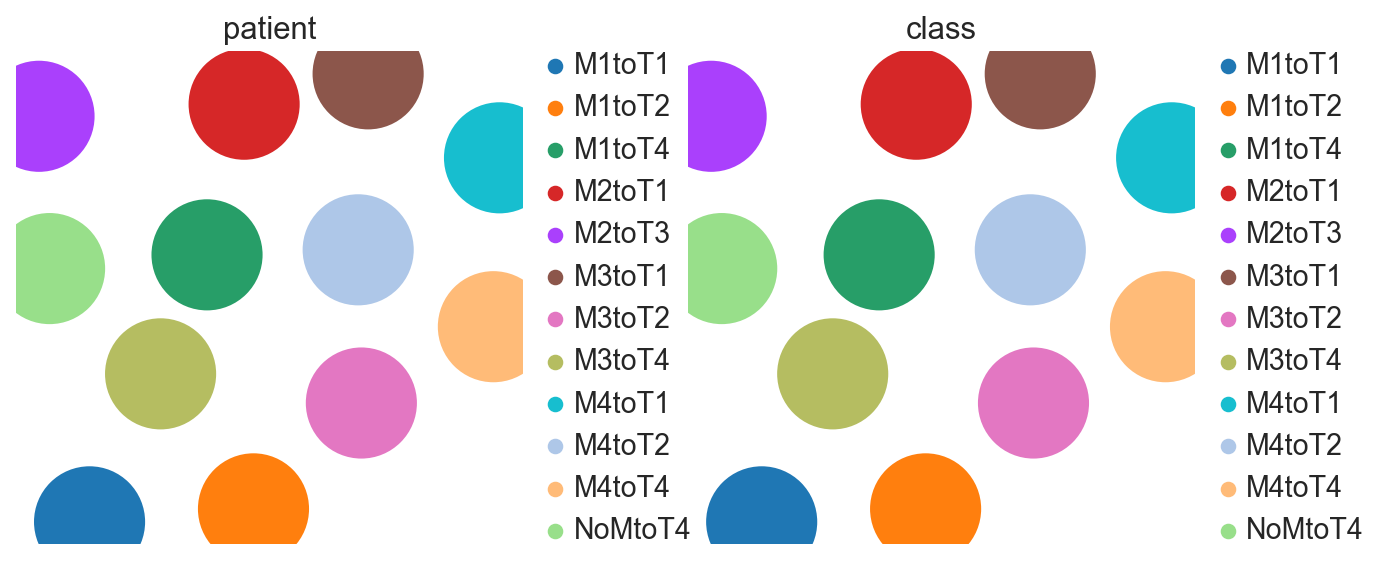

In [575]:
# Scale the data
sc.pp.scale(padata_1_1, max_value=10)

# Generate PCA features
sc.tl.pca(padata_1_1)

# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(padata_1_1)

# Generate UMAP features
sc.tl.umap(padata_1_1)

# Visualize
sc.pl.umap(padata_1_1, color=['patient','class'], frameon=False)

In [576]:
padata_1_1.X

array([[-0.65209407,  1.1237782 , -0.8157149 , ...,  0.74602276,
        -0.34389168,  0.40449983],
       [ 0.16897008, -0.593113  , -0.49943134, ..., -0.98735267,
        -0.25247708,  0.02121333],
       [-0.03815765,  0.11963939,  0.1522758 , ...,  0.23104754,
         0.2683214 ,  0.09509412],
       ...,
       [-1.0831558 , -0.8253376 , -0.74598044, ..., -0.6882874 ,
        -0.53511393,  0.49682152],
       [-1.2383845 , -1.1472893 ,  0.12131654, ..., -0.68153465,
        -1.7418321 ,  1.6100854 ],
       [ 0.35318568,  0.8638502 ,  1.2078316 , ..., -0.73618126,
         1.8802277 , -1.2117544 ]], dtype=float32)

In [623]:
del padata_1_1.obs['T_patient_cluster']

In [624]:
padata_1_1.write('Pseudobulk_69P_epi_and_non-epi.h5ad', compression='gzip')

# bulk RNA-seq starts with raw count (not from FPKM)

In [444]:
IMnonIM_raw = pd.read_csv('NonIM_and_IM_raw_counts_with_gene_symbols_1.csv', index_col=0)
IMnonIM_raw

,EP09,EP12,EP25,EP39,EP59,EP107,EP112,EP14,EP04,EP08,EP29,EP33,EP63,EP114,EP23,EP54,EP45
genes,,,,,,,,,,,,,,,,,
TSPAN6,0.0,0.0,1.0,339.00,144.00,430.00,1153.00,104.00,0.0,1.00,164.00,80.00,109.00,77.00,106.00,183.00,0.00
TNMD,0.0,0.0,0.0,0.00,2.00,0.00,0.00,0.00,0.0,0.00,2.00,11.00,0.00,0.00,0.00,0.00,0.00
DPM1,0.0,534.0,0.0,2608.00,1252.00,1760.00,3232.00,1021.00,536.0,403.00,874.00,214.00,888.00,958.00,1306.00,2738.00,39.00
SCYL3,0.0,8.0,110.0,481.25,388.36,114.76,2226.79,45.82,22.0,158.56,184.65,59.72,82.95,116.97,149.47,168.38,44.47
C1orf112,0.0,185.0,0.0,1962.75,981.64,208.24,10635.21,123.18,36.0,146.44,302.35,193.28,186.05,272.03,221.53,435.62,70.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [445]:
df_20 = pd.DataFrame(IMnonIM_raw)

In [446]:
df_20

,EP09,EP12,EP25,EP39,EP59,EP107,EP112,EP14,EP04,EP08,EP29,EP33,EP63,EP114,EP23,EP54,EP45
genes,,,,,,,,,,,,,,,,,
TSPAN6,0.0,0.0,1.0,339.00,144.00,430.00,1153.00,104.00,0.0,1.00,164.00,80.00,109.00,77.00,106.00,183.00,0.00
TNMD,0.0,0.0,0.0,0.00,2.00,0.00,0.00,0.00,0.0,0.00,2.00,11.00,0.00,0.00,0.00,0.00,0.00
DPM1,0.0,534.0,0.0,2608.00,1252.00,1760.00,3232.00,1021.00,536.0,403.00,874.00,214.00,888.00,958.00,1306.00,2738.00,39.00
SCYL3,0.0,8.0,110.0,481.25,388.36,114.76,2226.79,45.82,22.0,158.56,184.65,59.72,82.95,116.97,149.47,168.38,44.47
C1orf112,0.0,185.0,0.0,1962.75,981.64,208.24,10635.21,123.18,36.0,146.44,302.35,193.28,186.05,272.03,221.53,435.62,70.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [447]:
# Replace infinite data with nan
df_21 = df_20[df_20.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df_21

,EP09,EP12,EP25,EP39,EP59,EP107,EP112,EP14,EP04,EP08,EP29,EP33,EP63,EP114,EP23,EP54,EP45
genes,,,,,,,,,,,,,,,,,
TSPAN6,0.0,0.0,1.0,339.00,144.00,430.00,1153.00,104.00,0.0,1.00,164.00,80.00,109.00,77.00,106.00,183.00,0.00
TNMD,0.0,0.0,0.0,0.00,2.00,0.00,0.00,0.00,0.0,0.00,2.00,11.00,0.00,0.00,0.00,0.00,0.00
DPM1,0.0,534.0,0.0,2608.00,1252.00,1760.00,3232.00,1021.00,536.0,403.00,874.00,214.00,888.00,958.00,1306.00,2738.00,39.00
SCYL3,0.0,8.0,110.0,481.25,388.36,114.76,2226.79,45.82,22.0,158.56,184.65,59.72,82.95,116.97,149.47,168.38,44.47
C1orf112,0.0,185.0,0.0,1962.75,981.64,208.24,10635.21,123.18,36.0,146.44,302.35,193.28,186.05,272.03,221.53,435.62,70.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [448]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57820 entries, TSPAN6 to nan
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EP09    57820 non-null  float64
 1   EP12    57820 non-null  float64
 2   EP25    57820 non-null  float64
 3   EP39    57820 non-null  float64
 4   EP59    57820 non-null  float64
 5   EP107   57820 non-null  float64
 6   EP112   57820 non-null  float64
 7   EP14    57820 non-null  float64
 8   EP04    57820 non-null  float64
 9   EP08    57820 non-null  float64
 10  EP29    57820 non-null  float64
 11  EP33    57820 non-null  float64
 12  EP63    57820 non-null  float64
 13  EP114   57820 non-null  float64
 14  EP23    57820 non-null  float64
 15  EP54    57820 non-null  float64
 16  EP45    57820 non-null  float64
dtypes: float64(17)
memory usage: 7.9+ MB


In [449]:
# Drop rows with NaN
df_21 = pd.DataFrame(df_21)
df_21.dropna(inplace=True)
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57820 entries, TSPAN6 to nan
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EP09    57820 non-null  float64
 1   EP12    57820 non-null  float64
 2   EP25    57820 non-null  float64
 3   EP39    57820 non-null  float64
 4   EP59    57820 non-null  float64
 5   EP107   57820 non-null  float64
 6   EP112   57820 non-null  float64
 7   EP14    57820 non-null  float64
 8   EP04    57820 non-null  float64
 9   EP08    57820 non-null  float64
 10  EP29    57820 non-null  float64
 11  EP33    57820 non-null  float64
 12  EP63    57820 non-null  float64
 13  EP114   57820 non-null  float64
 14  EP23    57820 non-null  float64
 15  EP54    57820 non-null  float64
 16  EP45    57820 non-null  float64
dtypes: float64(17)
memory usage: 7.9+ MB


In [450]:
df_21

,EP09,EP12,EP25,EP39,EP59,EP107,EP112,EP14,EP04,EP08,EP29,EP33,EP63,EP114,EP23,EP54,EP45
genes,,,,,,,,,,,,,,,,,
TSPAN6,0.0,0.0,1.0,339.00,144.00,430.00,1153.00,104.00,0.0,1.00,164.00,80.00,109.00,77.00,106.00,183.00,0.00
TNMD,0.0,0.0,0.0,0.00,2.00,0.00,0.00,0.00,0.0,0.00,2.00,11.00,0.00,0.00,0.00,0.00,0.00
DPM1,0.0,534.0,0.0,2608.00,1252.00,1760.00,3232.00,1021.00,536.0,403.00,874.00,214.00,888.00,958.00,1306.00,2738.00,39.00
SCYL3,0.0,8.0,110.0,481.25,388.36,114.76,2226.79,45.82,22.0,158.56,184.65,59.72,82.95,116.97,149.47,168.38,44.47
C1orf112,0.0,185.0,0.0,1962.75,981.64,208.24,10635.21,123.18,36.0,146.44,302.35,193.28,186.05,272.03,221.53,435.62,70.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [451]:
df_21 = df_21.dropna()
df_21

,EP09,EP12,EP25,EP39,EP59,EP107,EP112,EP14,EP04,EP08,EP29,EP33,EP63,EP114,EP23,EP54,EP45
genes,,,,,,,,,,,,,,,,,
TSPAN6,0.0,0.0,1.0,339.00,144.00,430.00,1153.00,104.00,0.0,1.00,164.00,80.00,109.00,77.00,106.00,183.00,0.00
TNMD,0.0,0.0,0.0,0.00,2.00,0.00,0.00,0.00,0.0,0.00,2.00,11.00,0.00,0.00,0.00,0.00,0.00
DPM1,0.0,534.0,0.0,2608.00,1252.00,1760.00,3232.00,1021.00,536.0,403.00,874.00,214.00,888.00,958.00,1306.00,2738.00,39.00
SCYL3,0.0,8.0,110.0,481.25,388.36,114.76,2226.79,45.82,22.0,158.56,184.65,59.72,82.95,116.97,149.47,168.38,44.47
C1orf112,0.0,185.0,0.0,1962.75,981.64,208.24,10635.21,123.18,36.0,146.44,302.35,193.28,186.05,272.03,221.53,435.62,70.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [452]:
df_21_1 = df_21.T
df_21_1

genes,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EP09,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP12,0.0,0.0,534.0,8.00,185.00,0.0,311.00,0.00,829.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP25,1.0,0.0,0.0,110.00,0.00,287.0,388.00,0.00,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP39,339.0,0.0,2608.0,481.25,1962.75,163.0,6649.65,557.12,2568.0,459.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP59,144.0,2.0,1252.0,388.36,981.64,87.0,2879.05,370.76,1393.0,423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP107,430.0,0.0,1760.0,114.76,208.24,34.0,4694.33,418.26,2888.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP112,1153.0,0.0,3232.0,2226.79,10635.21,265.0,9829.34,976.56,5396.0,989.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP14,104.0,0.0,1021.0,45.82,123.18,12.0,1257.97,110.00,744.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP04,0.0,0.0,536.0,22.00,36.00,0.0,231.00,259.00,13463.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP08,1.0,0.0,403.0,158.56,146.44,10.0,1016.00,96.00,1112.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [453]:
df_21_1.to_csv('IM_nonIM_for_adata_from_raw.csv')

In [454]:
adata_21 = anndata.read_csv('IM_nonIM_for_adata_from_raw.csv')
adata_21

AnnData object with n_obs × n_vars = 17 × 57820

In [499]:
#adata_21 = anndata.read_csv('IM_nonIM_for_adata_from_raw.csv')
#adata_21

AnnData object with n_obs × n_vars = 17 × 57820

In [503]:
adata_21.obs['dataset'] ="IM_nonIM"

In [505]:
adata_21.obs['patient'] = ['EP09','EP12','EP25','EP39','EP59','EP107','EP112','EP14','EP04','EP08',
                          'EP29','EP33','EP63','EP114','EP23','EP54','EP45']
adata_21.obs

,dataset,patient
EP09,IM_nonIM,EP09
EP12,IM_nonIM,EP12
EP25,IM_nonIM,EP25
EP39,IM_nonIM,EP39
EP59,IM_nonIM,EP59
EP107,IM_nonIM,EP107
EP112,IM_nonIM,EP112
EP14,IM_nonIM,EP14
EP04,IM_nonIM,EP04
EP08,IM_nonIM,EP08


In [506]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'IM': ['EP23','EP29','EP33','EP45','EP54','EP63','EP114'],
             'Non-IM': ['EP04','EP08','EP09','EP12','EP14','EP25','EP39','EP59','EP107','EP112'],
             
            }

# Initialize empty column in cell metadata
adata_21.obs['class'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_21.obs.patient).isin(cell_dict[i])
    adata_21.obs.loc[ind,'class'] = i
adata_21.obs

,dataset,patient,class
EP09,IM_nonIM,EP09,Non-IM
EP12,IM_nonIM,EP12,Non-IM
EP25,IM_nonIM,EP25,Non-IM
EP39,IM_nonIM,EP39,Non-IM
EP59,IM_nonIM,EP59,Non-IM
EP107,IM_nonIM,EP107,Non-IM
EP112,IM_nonIM,EP112,Non-IM
EP14,IM_nonIM,EP14,Non-IM
EP04,IM_nonIM,EP04,Non-IM
EP08,IM_nonIM,EP08,Non-IM


In [507]:
# Store raw counts in layers
adata_21.layers['counts'] = adata_21.X

In [508]:
adata_21

AnnData object with n_obs × n_vars = 17 × 57820
    obs: 'dataset', 'patient', 'class'
    layers: 'counts'

In [509]:
adata_21.var_names_make_unique()
adata_21

AnnData object with n_obs × n_vars = 17 × 57820
    obs: 'dataset', 'patient', 'class'
    layers: 'counts'

In [510]:
adata_21.obs['class'] = adata_21.obs['class'].astype('category')
adata_21.obs['patient'] = adata_21.obs['patient'].astype('category')
adata_21.obs['dataset'] = adata_21.obs['dataset'].astype('category')

In [511]:
adata_21.obs

,dataset,patient,class
EP09,IM_nonIM,EP09,Non-IM
EP12,IM_nonIM,EP12,Non-IM
EP25,IM_nonIM,EP25,Non-IM
EP39,IM_nonIM,EP39,Non-IM
EP59,IM_nonIM,EP59,Non-IM
EP107,IM_nonIM,EP107,Non-IM
EP112,IM_nonIM,EP112,Non-IM
EP14,IM_nonIM,EP14,Non-IM
EP04,IM_nonIM,EP04,Non-IM
EP08,IM_nonIM,EP08,Non-IM


In [512]:
adata_21.to_df()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,-23923,-23924,-23925,-23926,-23927,-23928,-23929,-23930,-23931,-23932
EP09,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP12,0.0,0.0,534.0,8.000000,185.000000,0.0,311.000000,0.000000,829.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP25,1.0,0.0,0.0,110.000000,0.000000,287.0,388.000000,0.000000,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP39,339.0,0.0,2608.0,481.250000,1962.750000,163.0,6649.649902,557.119995,2568.0,459.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP59,144.0,2.0,1252.0,388.359985,981.640015,87.0,2879.050049,370.760010,1393.0,423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP107,430.0,0.0,1760.0,114.760002,208.240005,34.0,4694.330078,418.260010,2888.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP112,1153.0,0.0,3232.0,2226.790039,10635.209961,265.0,9829.339844,976.559998,5396.0,989.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP14,104.0,0.0,1021.0,45.820000,123.180000,12.0,1257.969971,110.000000,744.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP04,0.0,0.0,536.0,22.000000,36.000000,0.0,231.000000,259.000000,13463.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP08,1.0,0.0,403.0,158.559998,146.440002,10.0,1016.000000,96.000000,1112.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [577]:
adata_21.to_df()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,-23923,-23924,-23925,-23926,-23927,-23928,-23929,-23930,-23931,-23932
EP09,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP12,0.0,0.0,534.0,8.000000,185.000000,0.0,311.000000,0.000000,829.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP25,1.0,0.0,0.0,110.000000,0.000000,287.0,388.000000,0.000000,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP39,339.0,0.0,2608.0,481.250000,1962.750000,163.0,6649.649902,557.119995,2568.0,459.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP59,144.0,2.0,1252.0,388.359985,981.640015,87.0,2879.050049,370.760010,1393.0,423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP107,430.0,0.0,1760.0,114.760002,208.240005,34.0,4694.330078,418.260010,2888.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP112,1153.0,0.0,3232.0,2226.790039,10635.209961,265.0,9829.339844,976.559998,5396.0,989.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP14,104.0,0.0,1021.0,45.820000,123.180000,12.0,1257.969971,110.000000,744.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP04,0.0,0.0,536.0,22.000000,36.000000,0.0,231.000000,259.000000,13463.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP08,1.0,0.0,403.0,158.559998,146.440002,10.0,1016.000000,96.000000,1112.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [578]:
# Normalize and log-transform
sc.pp.normalize_total(adata_21, target_sum=1e4)
sc.pp.log1p(adata_21)
adata_21.layers['normalized'] = adata_21.X

normalizing counts per cell
    finished (0:00:00)


In [579]:
adata_21.to_df()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,-23923,-23924,-23925,-23926,-23927,-23928,-23929,-23930,-23931,-23932
EP09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP12,0.000000,0.000000,1.079345,0.028689,0.514648,0.000000,0.756803,0.000000,1.390284,0.113380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP25,0.003880,0.000000,0.000000,0.355978,0.000000,0.749331,0.919556,0.000000,0.015429,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP39,0.136725,0.000000,0.754785,0.188960,0.614257,0.068076,1.354267,0.215742,0.746625,0.180967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP59,0.098491,0.001437,0.641811,0.246194,0.533910,0.060657,1.121488,0.236255,0.693781,0.265472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP107,0.275404,0.000000,0.831929,0.081229,0.142842,0.024761,1.495461,0.268810,1.140868,0.118750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP112,0.243632,0.000000,0.572848,0.427094,1.265440,0.061477,1.209508,0.209984,0.829025,0.212394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP14,0.257282,0.000000,1.355964,0.121571,0.298267,0.033295,1.514919,0.270285,1.131083,0.052216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP04,0.000000,0.000000,0.852402,0.053746,0.086503,0.000000,0.457281,0.500804,3.549329,0.148963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP08,0.001924,0.000000,0.574490,0.266513,0.248468,0.019078,1.084152,0.169664,1.144809,0.146644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


computing PCA
    with n_comps=16
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 16
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


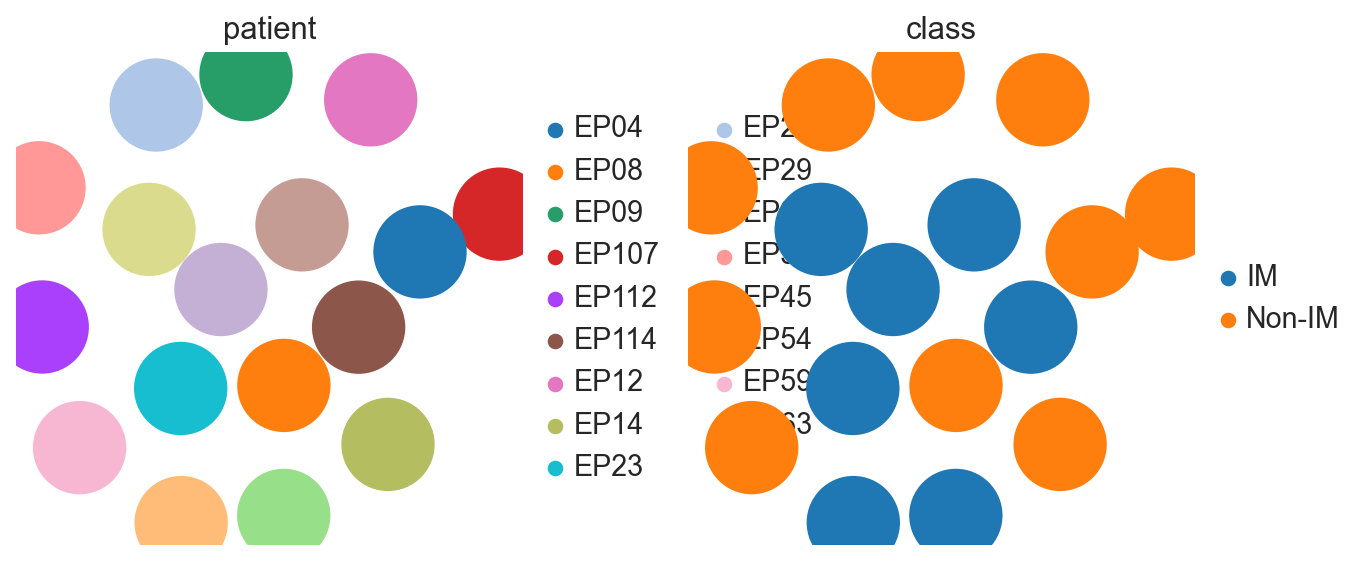

In [580]:
# Scale the data
sc.pp.scale(adata_21, max_value=10)

# Generate PCA features
sc.tl.pca(adata_21)

# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(adata_21)

# Generate UMAP features
sc.tl.umap(adata_21)

# Visualize
sc.pl.umap(adata_21, color=['patient','class'], frameon=False)

In [581]:
adata_21.X

array([[-1.0585363 , -0.31273842, -1.8073903 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.0585363 , -0.31273842,  1.1253452 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.0188631 , -0.31273842, -1.8073903 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08804984, -0.31273842,  0.36753103, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04987978, -0.31273842,  0.9043002 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.0585363 , -0.31273842, -1.1405897 , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

# 69P and IM_and_Non-IM concatenate

In [582]:
adata_22 = padata_1_1.concatenate(adata_21)
adata_22

AnnData object with n_obs × n_vars = 29 × 10472
    obs: 'tissue', 'batch', 'source', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'T_patient_cluster', 'class', 'patient'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1'
    obsm: 'X_pca', 'X_umap'
    layers: 'normalized'

In [583]:
adata_22.var

,mean-0,std-0,mean-1,std-1
A1BG,0.540881,0.239372,0.027872,0.029503
A2M,0.380993,0.143787,1.598486,0.739379
A4GALT,0.400904,0.143076,0.229851,0.284216
AAAS,0.590384,0.112426,0.391871,0.226465
AACS,0.725124,0.153786,0.193556,0.114000
...,...,...,...,...
ZXDB,0.811495,0.157132,0.114706,0.099586
ZXDC,0.857731,0.201997,0.292650,0.191648
ZYG11B,0.672161,0.124316,0.193910,0.126903
ZYX,0.380334,0.062871,0.456036,0.265772


In [584]:
adata_22.obs

,tissue,batch,source,celltype,crude,celltype_detail,dataset,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44,T_patient_cluster,class,patient
M1toT1-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_1,Myeloid_1,M1toT1,NaN,M1toT1,M1toT1
M1toT2-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_2,Myeloid_1,M1toT2,NaN,M1toT2,M1toT2
M1toT4-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_4,Myeloid_1,M1toT4,NaN,M1toT4,M1toT4
M2toT1-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_1,Myeloid_2,M2toT1,NaN,M2toT1,M2toT1
M2toT3-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_3,Myeloid_2,M2toT3,NaN,M2toT3,M2toT3
M3toT1-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_1,Myeloid_3,M3toT1,NaN,M3toT1,M3toT1
M3toT2-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_2,Myeloid_3,M3toT2,NaN,M3toT2,M3toT2
M3toT4-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_4,Myeloid_3,M3toT4,NaN,M3toT4,M3toT4
M4toT1-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_1,Myeloid_4,M4toT1,NaN,M4toT1,M4toT1
M4toT2-0,tumor,0,ESCC_patient,epithelial,epithelial,epithelial,69P_all_cells,T_2,Myeloid_4,M4toT2,NaN,M4toT2,M4toT2


In [585]:
adata_22.obs['class'] = adata_22.obs['class'].astype('category')
adata_22.obs['patient'] = adata_22.obs['patient'].astype('category')

In [586]:
sc.tl.pca(adata_22)

computing PCA
    with n_comps=28
    finished (0:00:00)


In [587]:
adata_22.to_df()

,A1BG,A2M,A4GALT,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AAR2,...,ZSWIM9,ZUP1,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
M1toT1-0,-0.652094,1.123778,-0.815715,0.865677,0.097831,-0.905920,-1.622907,-0.491361,-0.517452,0.113793,...,-0.205070,1.445415,1.486704,0.757996,-0.703451,-0.701200,0.906748,0.746023,-0.343892,0.404500
M1toT2-0,0.168970,-0.593113,-0.499431,1.114518,0.450457,0.121691,-0.698615,-0.460001,-0.551875,1.567974,...,-1.186980,0.687582,-0.202783,1.072744,2.191070,-0.501346,1.055915,-0.987353,-0.252477,0.021213
M1toT4-0,-0.038158,0.119639,0.152276,-0.202607,-0.699536,0.275286,0.130331,-0.083549,-0.460507,0.114991,...,0.354468,0.006633,-1.157534,-1.270710,-0.297040,0.236945,-0.051465,0.231048,0.268321,0.095094
M2toT1-0,2.339837,-1.267854,-1.290212,0.166086,-0.898428,-0.022059,1.862509,-0.315704,-0.968281,1.175926,...,1.344499,0.258808,-1.547391,0.847841,0.802999,-0.509470,0.163680,0.485110,0.376245,-0.978635
M2toT3-0,1.364228,2.167126,2.493330,-2.321572,-1.306513,-2.187107,1.500944,-0.605187,1.089114,-1.218572,...,-1.376879,0.422792,-1.231380,-0.802181,-1.265201,-0.382632,-2.063889,-1.984465,0.041823,-2.143529
M3toT1-0,-0.260261,0.273350,-0.121977,-0.530128,-0.162144,-1.251932,-0.314203,-0.369593,-0.164261,-0.632143,...,0.559962,-0.648121,0.417734,-0.987693,-0.899373,1.668605,0.012159,0.950791,-0.129141,0.225127
M3toT2-0,-0.311272,-0.335594,-0.200680,1.040814,0.389531,0.436482,-0.614253,3.011676,-0.016766,1.047328,...,0.840194,0.055665,0.166209,-0.044925,0.616153,0.323934,0.233853,0.692192,-0.158967,0.511844
M3toT4-0,-0.376052,-0.009762,-0.308825,0.077719,-0.168433,0.795572,-0.137190,-0.209069,0.074747,0.184337,...,0.858024,1.471746,-0.439867,0.538511,0.155538,0.508295,-0.872187,0.521167,1.625609,0.788361
M4toT1-0,-0.266844,-0.368794,0.008066,-1.184689,-0.313177,1.388844,-0.132547,-0.494712,-0.027942,-0.745779,...,1.302883,-0.641760,-0.231623,-0.822289,-0.790844,1.484854,0.390879,1.451492,-1.030804,0.180871
M4toT2-0,-1.083156,-0.825338,-0.745980,0.808209,2.052146,0.400261,-0.143319,0.321130,-0.232591,-1.875919,...,-1.175003,-2.154692,0.314474,-0.379045,0.262846,0.646142,0.276999,-0.688287,-0.535114,0.496822


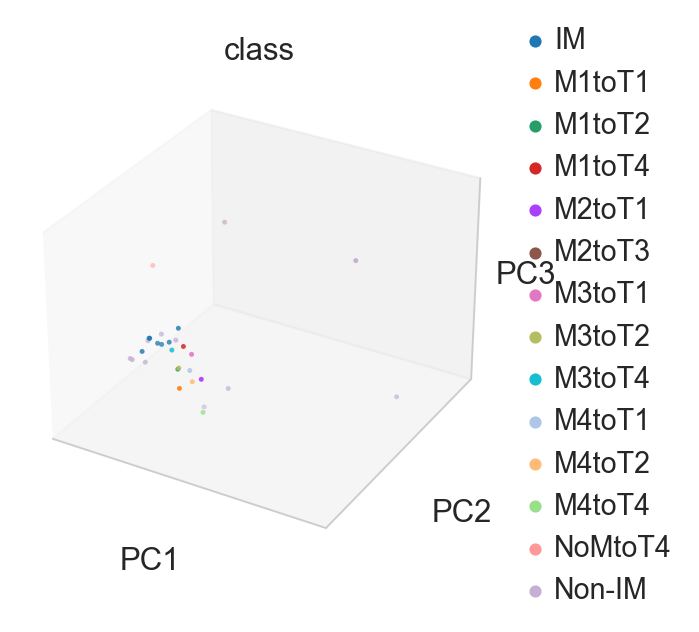

In [588]:
sc.pl.pca(adata_22, color=['class'], size=100000000, projection='3d')#, save='_3d_PCA_all_TME_and_Responders_pseudobulk.pdf')

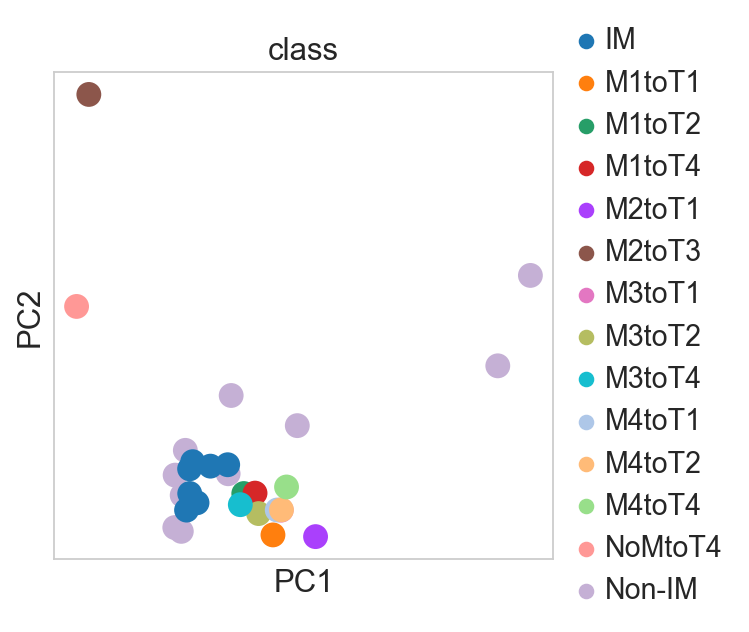

In [589]:
sc.pl.pca(adata_22, color='class', size=500)#, save='_pseudobulk_class.pdf')

    using 'X_pca' with n_pcs = 28
Storing dendrogram info using `.uns['dendrogram_class']`


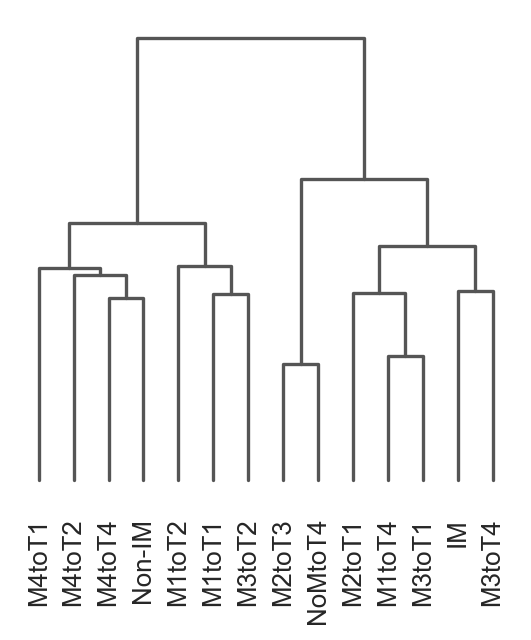

<Axes: >

In [615]:
# dendrogram after converting mouse gene to human gene
sc.tl.dendrogram(adata_22, 'class')
sc.pl.dendrogram(adata_22, 'class', save='_dendrogram_69P_IM_and_NonIM.pdf')

    using 'X_pca' with n_pcs = 28
Storing dendrogram info using `.uns['dendrogram_patient']`


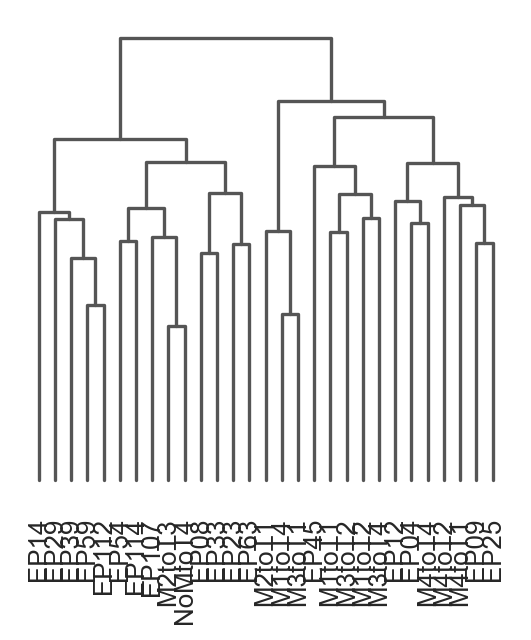

<Axes: >

In [591]:
# dendrogram after converting mouse gene to human gene
sc.tl.dendrogram(adata_22, 'patient')
sc.pl.dendrogram(adata_22, 'patient')

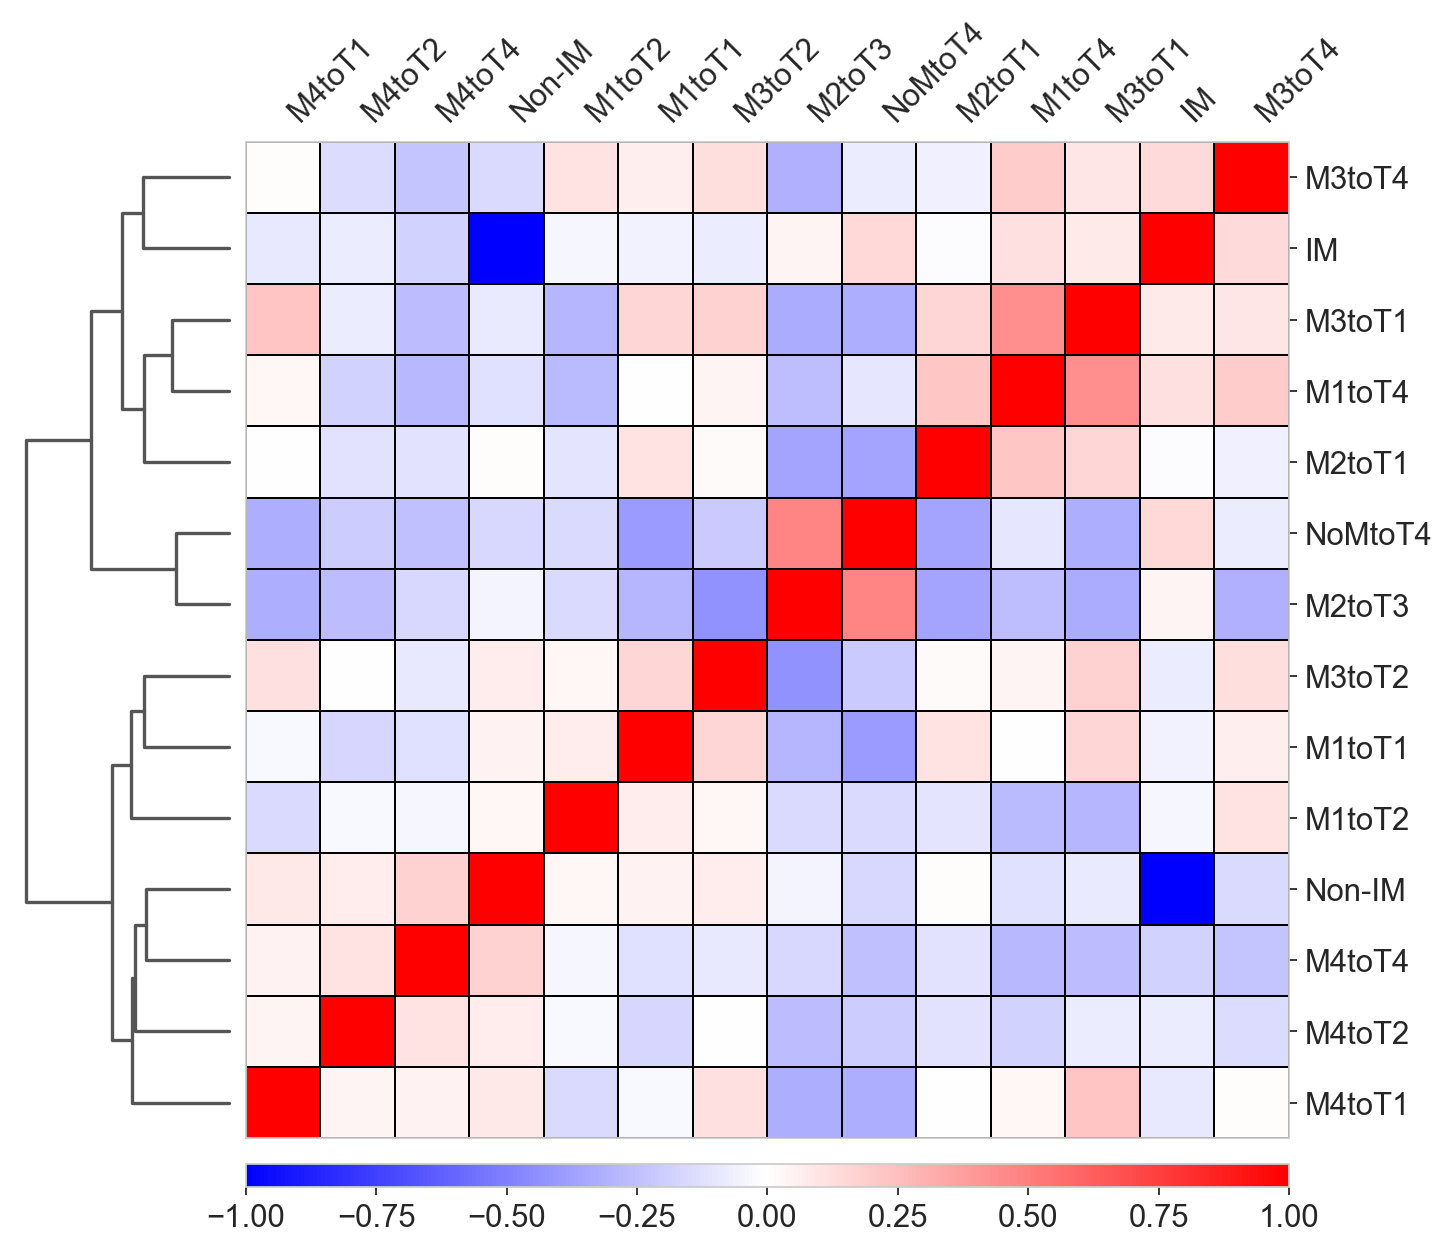

In [592]:
sc.pl.correlation_matrix(adata_22, groupby='class'#,cmap='YlGnBu'
                        )

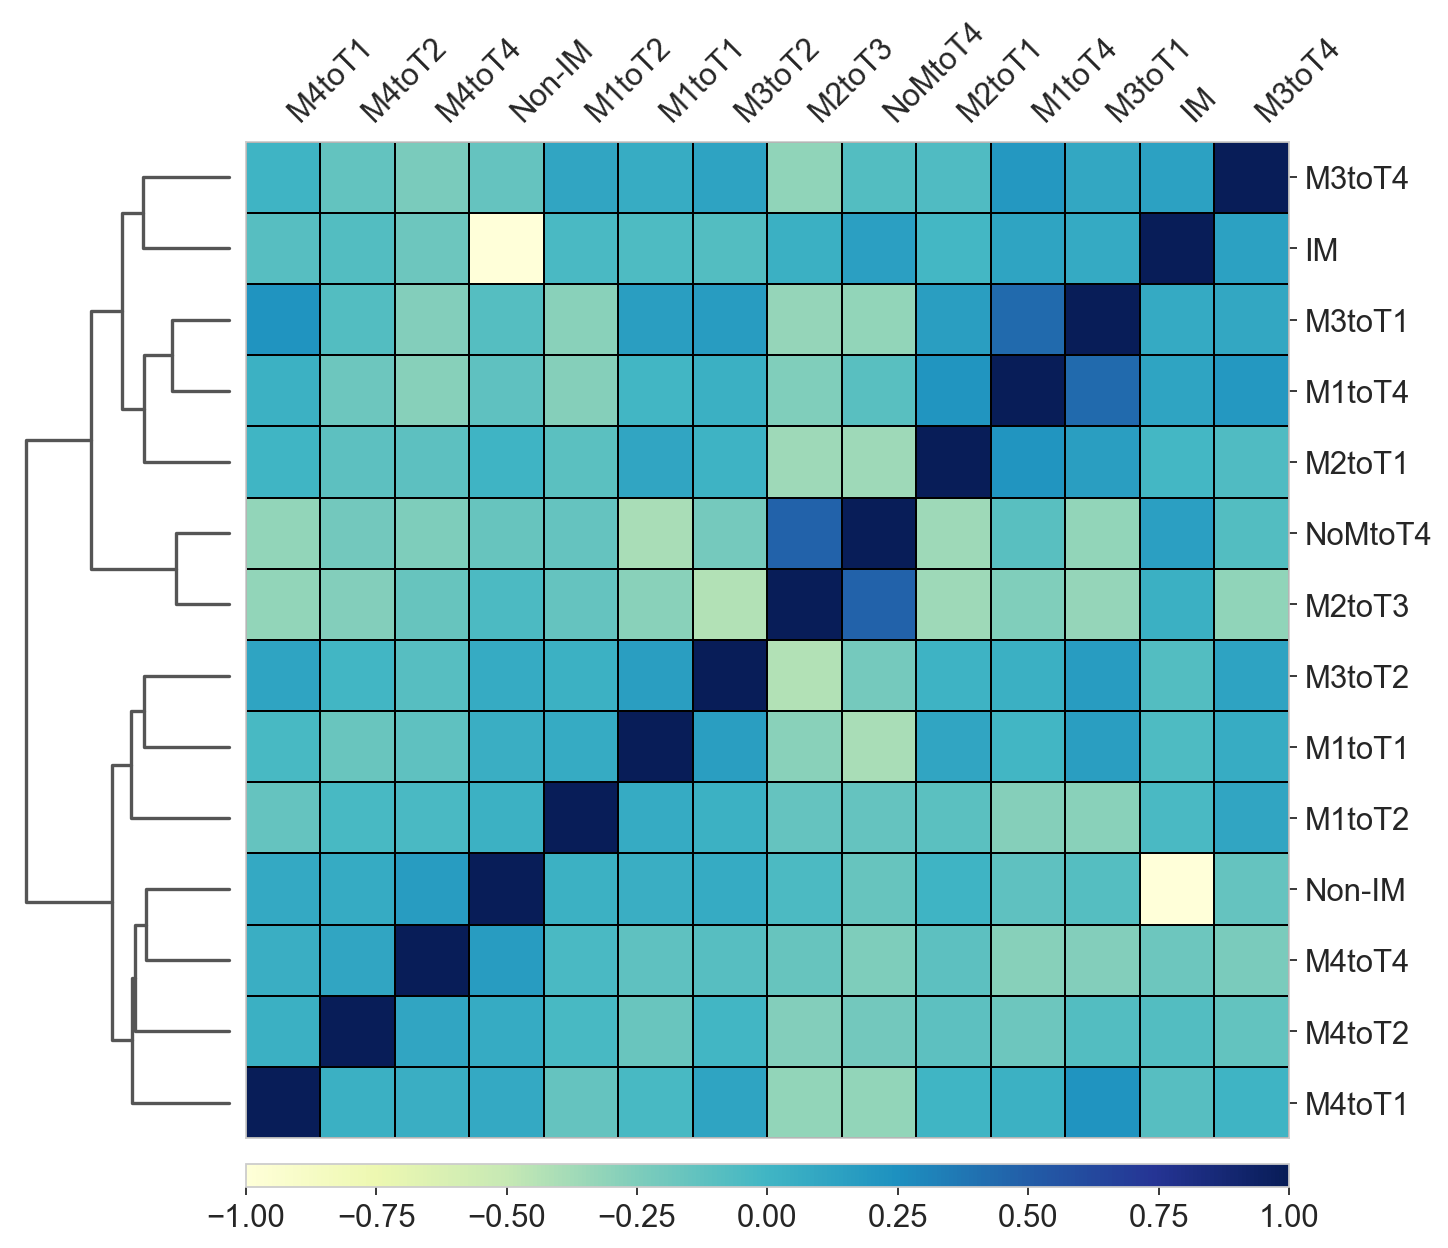

In [614]:
sc.pl.correlation_matrix(adata_22, groupby='class',cmap='YlGnBu',
                        save='_69P_and_IM_and_NonIM_comparison.pdf')

In [617]:
adata_22

AnnData object with n_obs × n_vars = 29 × 10472
    obs: 'tissue', 'batch', 'source', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'T_patient_cluster', 'class', 'patient'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1'
    uns: 'pca', 'class_colors', 'dendrogram_class', 'dendrogram_patient', 'patient_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'

In [620]:
del adata_22.obs["T_patient_cluster"]

In [621]:
adata_22.write('Pseudobulk_69P_IM_and_NonIM.h5ad', compression='gzip')